# 9. ETF 데이터 분석 및 시각화

## 9.1 요약

### 9.1.1 `seaborn`을 활용한 데이터 시각화

- 수치형 데이터 시각화
  - `barplot`, `boxplot`, `violinplot` (`seaborn`)  
  
  
- 서브 플롯 시각화
  - `subplots` (`matplotlib`)
  - `PairGrid` (`seaborn`)
    - 여러 변수를 시각화 할 때 사용
  - `FacetGrid` (`seaborn`)
    - 개별 변수에 있는 값들을 여러 개의 컬럼 또는 행으로 나눠서 시각화
    - `catplot` : categorical, 범주형 데이터 시각화 (kind: `count`, `bar`, `box`, `boxen`, `violin`)
    - `replot` : relational, 연속된 수치 데이터 시각화 (kind: `scatter`, `line`)
    - `displot` : distribution, 수치에 대한 분포 시각화 (kind: `histplot`, `kdeplot`, `ecdfplot`, `rugplot`)
    
<img src="./img/09_01.jpg" style="width: 450px; margin-left: 25px;" />

- 참고 : [seaborn 튜토리얼](https://seaborn.pydata.org/tutorial.html)

<br>

## 9.2 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# seaborn 버전 0.11.0 이상 확인
sns.__version__

'0.11.1'

In [3]:
# pandas 버전 1.0.0 이상 확인
pd.__version__ 

'1.1.5'

<br>

## 9.3 시각화를 위한 한글 폰트 설정

In [4]:
# 설정 가능한 그래프 스타일 확인
print(plt.style.available)

# 그래프 스타일 설정 (seaborn-whitegrid)
plt.style.use('seaborn-whitegrid') # seaborn 스타일 설정은 폰트 설정 이전에 실행해야 한다.

# 한글 폰트 설정
from matplotlib import font_manager, rc

# 일반 폰트 설정
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정
rc('axes', unicode_minus=False)

# retina display 적용 (선명하게)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


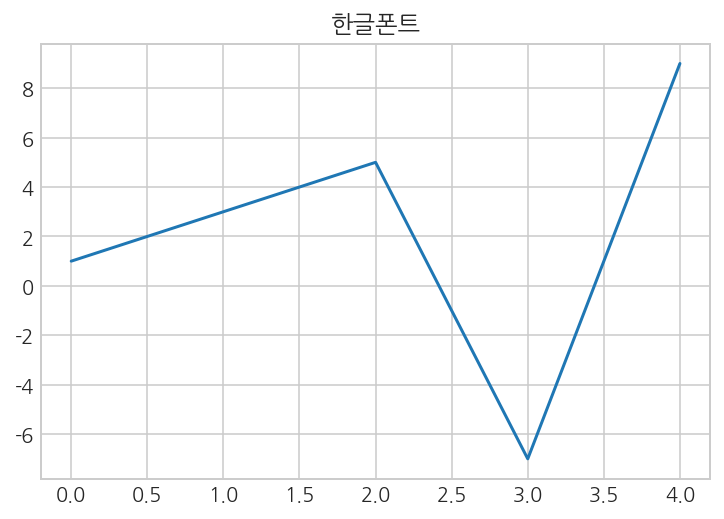

In [5]:
# 설정 확인
g = pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

<br>

## 9.4 데이터 로드

In [6]:
df = pd.read_csv('etf_2021-02-03.csv', dtype={'종목코드': np.object})
df.shape

(469, 17)

In [7]:
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,069500,1,KODEX 200,43130,2,355,0.83,43214.0,39.9522,8521906,366352,62625,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,42970,2,360,0.84,43038.0,39.9710,1650818,70651,31347,국내 시장지수,TIGER,False,False,False
2,252670,3,KODEX 200선물인버스2X,2055,5,-35,-1.67,2051.0,-51.2821,642008913,1329284,20227,국내 파생,KODEX,True,False,False
3,122630,3,KODEX 레버리지,27825,2,475,1.74,28022.0,92.0646,46157932,1275107,19088,국내 파생,KODEX,False,True,False
4,102780,2,KODEX 삼성그룹,10530,2,70,0.67,10545.0,37.6315,612363,6415,18522,국내 업종/테마,KODEX,False,False,False


In [8]:
df.tail()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
464,285010,2,KBSTAR 200중공업,8485,2,20,0.24,8481.0,16.7586,282,2,22,국내 업종/테마,KBSTAR,False,False,False
465,334700,5,KBSTAR 팔라듐선물인버스(H),5495,2,30,0.55,NaN,-1.5316,1816,9,22,원자재,KBSTAR,True,False,True
466,267500,4,KBSTAR 미국장기국채선물인버스2X(합성 H),6030,2,30,0.50,NaN,4.8951,4614,27,18,해외 주식,KBSTAR,True,False,True
467,285020,2,KBSTAR 200철강소재,7245,2,25,0.35,7246.0,25.5652,3443,24,17,국내 업종/테마,KBSTAR,False,False,False
468,287320,2,KBSTAR 200산업재,10750,2,220,2.09,10776.0,33.1226,47,0,13,국내 업종/테마,KBSTAR,False,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        469 non-null    object 
 1   탭코드         469 non-null    int64  
 2   종목명         469 non-null    object 
 3   현재가         469 non-null    int64  
 4   등락구분        469 non-null    int64  
 5   전일비         469 non-null    int64  
 6   등락률         469 non-null    float64
 7   순자산가치(NAV)  341 non-null    float64
 8   3개월수익률      452 non-null    float64
 9   거래량         469 non-null    int64  
 10  거래대금(백만)    469 non-null    int64  
 11  시가총액(억)     469 non-null    int64  
 12  유형          469 non-null    object 
 13  브랜드         469 non-null    object 
 14  인버스         469 non-null    bool   
 15  레버리지        469 non-null    bool   
 16  환헤지         469 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 52.8+ KB


- 순자산가치(NAV)
  - "ETF의 기초지수가 해외지수인 경우, 해당 ETF의 NAV가 제공되지 않습니다."  
  
  
- 3개월수익률
  - 상장된 지 3개월 미만의 ETF 종목에 대해서는 3개월수익률 데이터가 존재하지 않는다.

<br>

## 9.5 결측치 확인

In [10]:
df.notnull() # False: 결측치

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
465,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
466,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
467,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [11]:
df.isnull() # True: 결측치

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
465,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
466,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
print(True + True + False)
print(True == 1)
print(False == 0)

2
True
True


<br>

- `isnull()` 메서드의 반환값이 `True`(=`1`)인 값을 모두 더하여 결측치 갯수를 구할 수 있다.

<br>

### 9.5.1 컬럼별 결측치 확인

In [13]:
df.isnull().sum()

종목코드            0
탭코드             0
종목명             0
현재가             0
등락구분            0
전일비             0
등락률             0
순자산가치(NAV)    128
3개월수익률         17
거래량             0
거래대금(백만)        0
시가총액(억)         0
유형              0
브랜드             0
인버스             0
레버리지            0
환헤지             0
dtype: int64

<br>

### 9.5.2 결측치 비율 확인

In [14]:
df.isnull().mean() * 100

종목코드           0.000000
탭코드            0.000000
종목명            0.000000
현재가            0.000000
등락구분           0.000000
전일비            0.000000
등락률            0.000000
순자산가치(NAV)    27.292111
3개월수익률         3.624733
거래량            0.000000
거래대금(백만)       0.000000
시가총액(억)        0.000000
유형             0.000000
브랜드            0.000000
인버스            0.000000
레버리지           0.000000
환헤지            0.000000
dtype: float64

<br>

### 9.5.3 heatmap을 통한 결측치 시각화

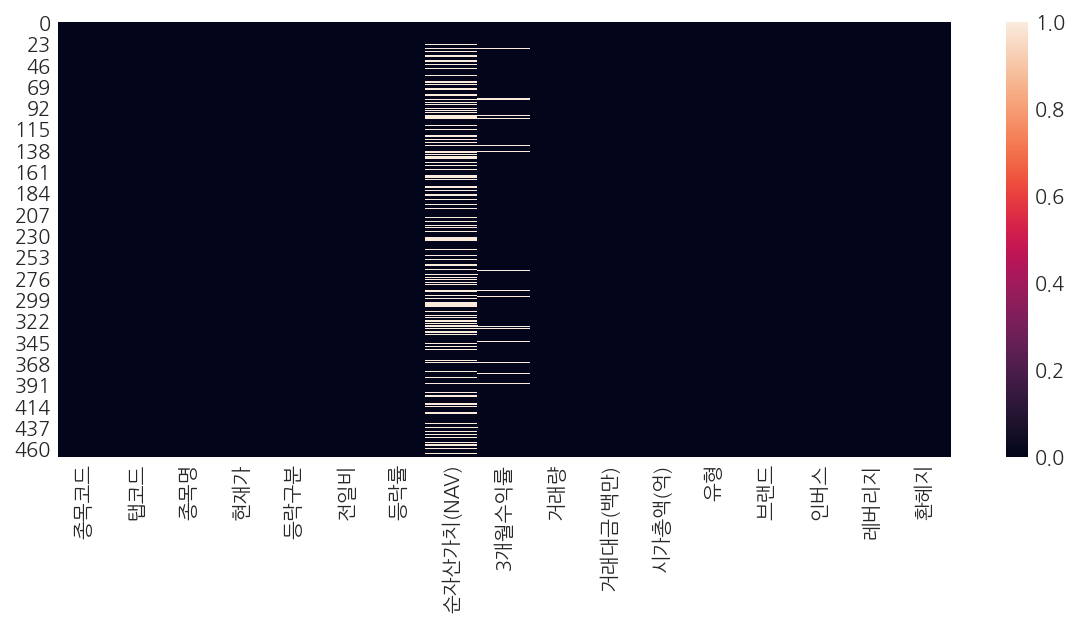

In [15]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull())
plt.show()

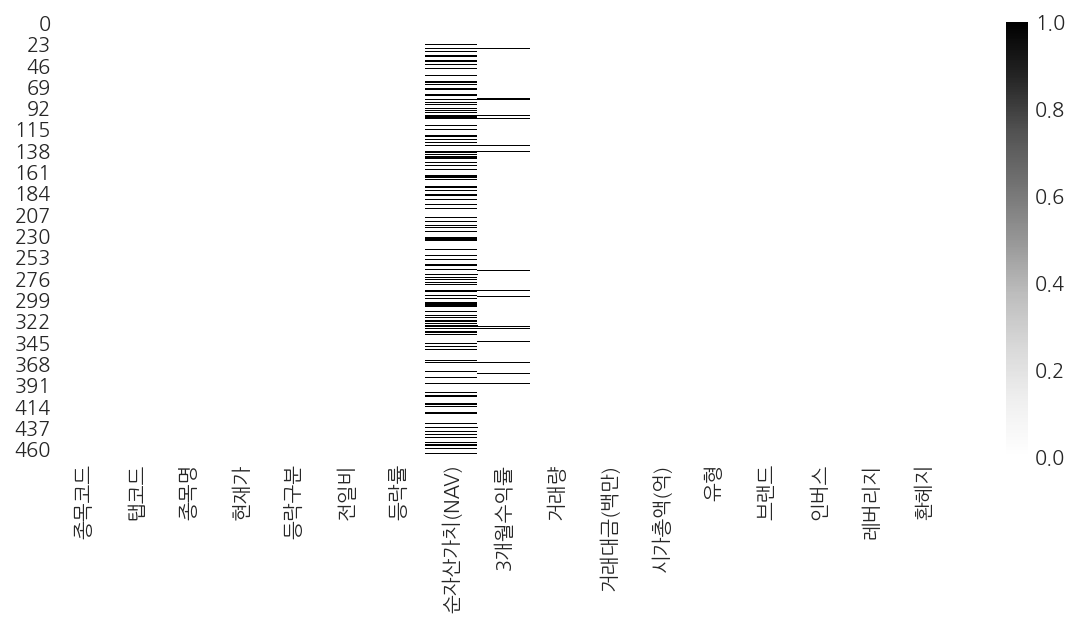

In [16]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cmap='Greys')
plt.show()

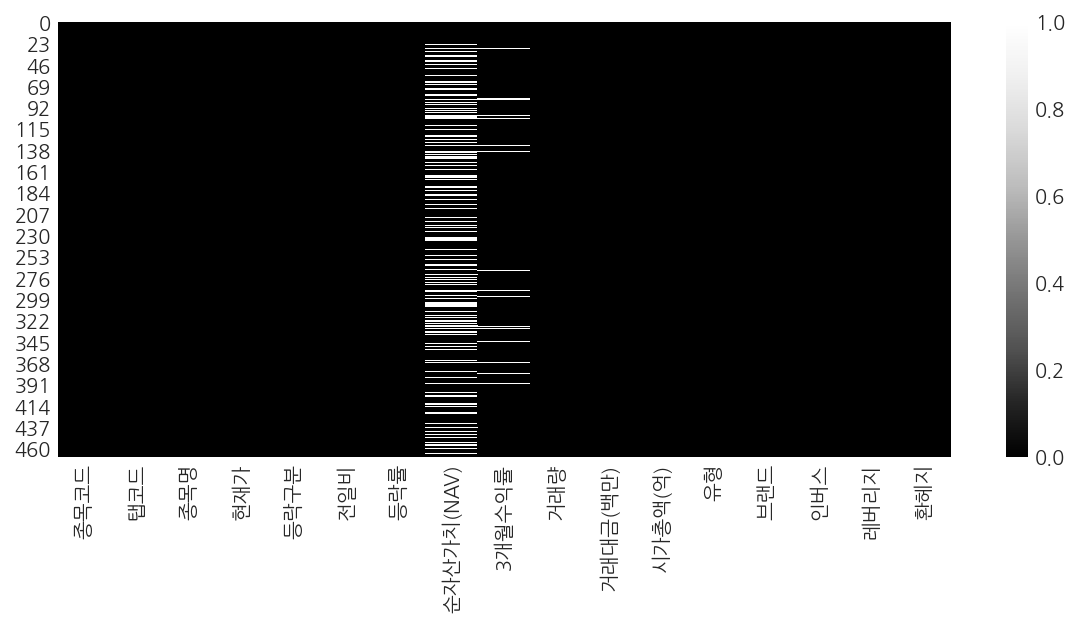

In [17]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cmap='Greys_r')
plt.show()

<br>

## 9.6 범주형 데이터의 빈도수

### 9.6.1 범주형 변수 찾기

수치 데이터에 대한 기술 통계값 확인

In [18]:
df.describe()

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,469.000000,469.000000,469.000000,469.000000,469.000000,341.000000,452.000000,4.690000e+02,4.690000e+02,469.000000
mean,3.264392,23528.560768,2.590618,131.300640,0.695416,26442.331378,22.009150,1.998222e+06,1.069966e+04,1228.149254
std,1.842759,25493.804432,1.154144,202.981551,1.069064,28052.290006,24.255505,3.020403e+07,9.039377e+04,4215.857920
min,1.000000,2045.000000,2.000000,-445.000000,-6.930000,2037.000000,-51.348200,0.000000e+00,0.000000e+00,13.000000
25%,2.000000,10750.000000,2.000000,10.000000,0.010000,10962.000000,5.462850,5.580000e+02,9.000000e+00,80.000000
50%,2.000000,14065.000000,2.000000,90.000000,0.680000,15127.000000,21.885050,6.221000e+03,9.400000e+01,155.000000
75%,4.000000,21745.000000,2.000000,200.000000,1.230000,28133.000000,37.774425,4.471000e+04,6.090000e+02,599.000000
max,7.000000,133650.000000,5.000000,1335.000000,7.460000,133607.000000,153.714200,6.420089e+08,1.329284e+06,62625.000000


<br>

`include` 속성을 사용하여 object type 변수만 확인

In [19]:
df.describe(include=np.object)

,종목코드,종목명,유형,브랜드
count,469,469,469,469
unique,469,469,7,15
top,136340,TIGER 소프트웨어,국내 업종/테마,TIGER
freq,1,1,174,128


<br>

`exclude` 속성을 사용하여 숫자형(number) type 변수를 제외한 나머지 변수 확인
- boolean type의 변수도 출력됨

In [20]:
df.describe(exclude=np.number) # 

,종목코드,종목명,유형,브랜드,인버스,레버리지,환헤지
count,469,469,469,469,469,469,469
unique,469,469,7,15,2,2,2
top,136340,TIGER 소프트웨어,국내 업종/테마,TIGER,False,False,False
freq,1,1,174,128,425,435,405


<br>

`nunique()` : 중복을 제외한 데이터의 갯수 출력
- object type이 아니더라도 `nunique()` 값이 작다면 범주형 변수에 해당할 수도 있다.
- *탭코드*, *등락구분*도 범주형 변수에 해당한다는 것을 알 수 있음

In [21]:
df.nunique()

종목코드          469
탭코드             7
종목명           469
현재가           445
등락구분            3
전일비           134
등락률           238
순자산가치(NAV)    339
3개월수익률        452
거래량           434
거래대금(백만)      281
시가총액(억)       313
유형              7
브랜드            15
인버스             2
레버리지            2
환헤지             2
dtype: int64

<br>

### 9.6.2 한 개의 변수 빈도수와 비율 (ETF 상품 유형별 빈도수)

pandas의 `plot.barh()` 활용

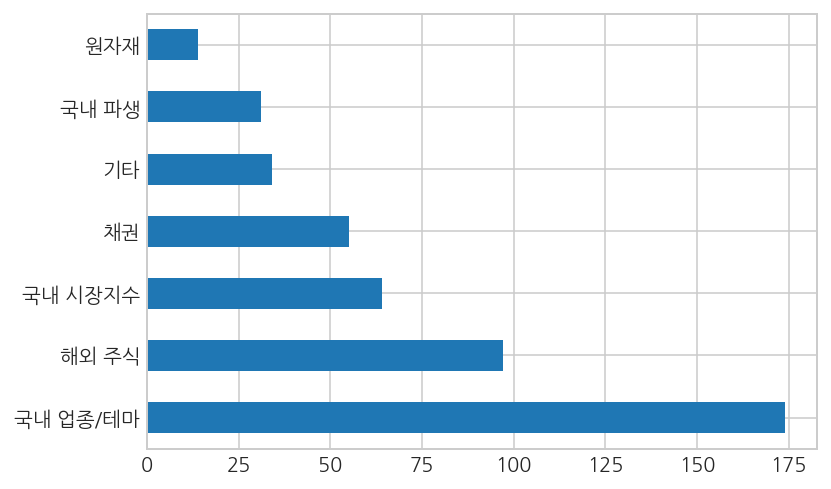

In [22]:
b = df['유형'].value_counts().plot.barh()

<br>

seaborn의 `countplot()` 활용

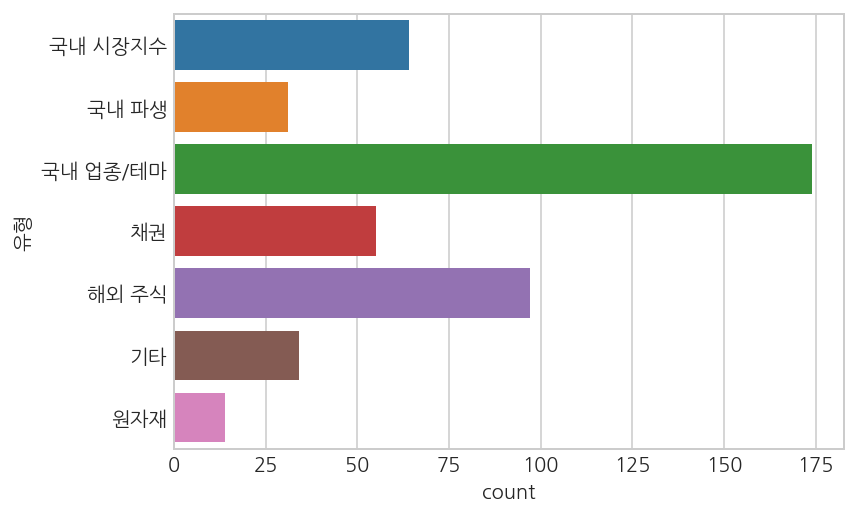

In [23]:
sns.countplot(data=df, y='유형')
plt.show()

<br>

빈도수 기준 정렬

- `value_counts()` 메서드를 수행하면 빈도수 기준으로 정렬된다.
- `value_counts().index`를 `countplot()`의 `order` 속성에 지정해주면 빈도수 기준으로 정렬할 수 있다.

In [24]:
df['유형'].value_counts().index

Index(['국내 업종/테마', '해외 주식', '국내 시장지수', '채권', '기타', '국내 파생', '원자재'], dtype='object')

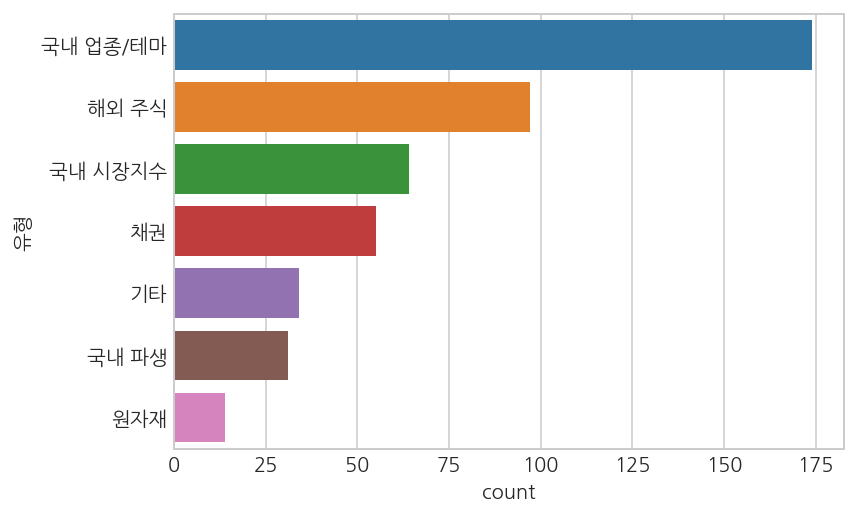

In [25]:
sns.countplot(data=df, y='유형', order=df['유형'].value_counts().index)
plt.show()

<br>

유형 이름 가나다순으로 정렬

- `data` 속성에 `df.sort_values('유형')`을 지정

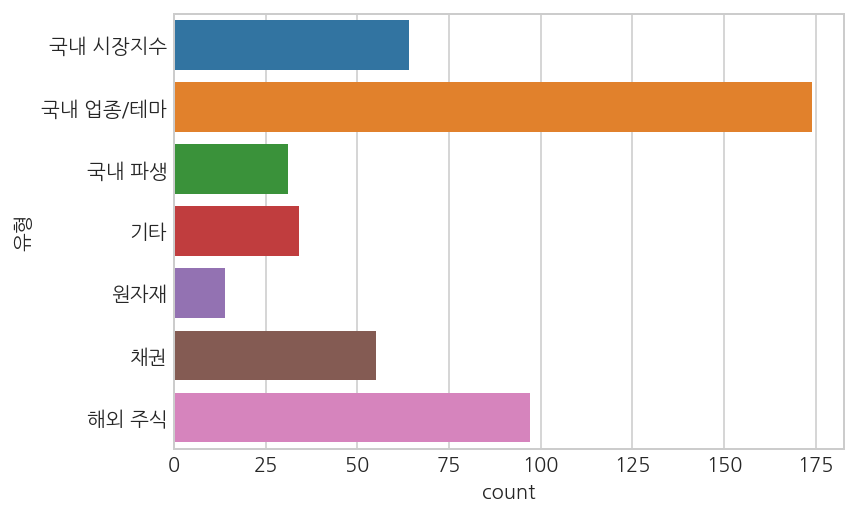

In [26]:
sns.countplot(data=df.sort_values('유형'), y='유형')
plt.show()

<br>

비율 확인

In [27]:
df['유형'].value_counts(normalize=True) * 100

국내 업종/테마    37.100213
해외 주식       20.682303
국내 시장지수     13.646055
채권          11.727079
기타           7.249467
국내 파생        6.609808
원자재          2.985075
Name: 유형, dtype: float64

<br>

### 9.6.3 두 개의 변수 빈도수와 비율 (유형 vs 인버스, 유형 vs 레버리지)

**1) 유형 vs 인버스**

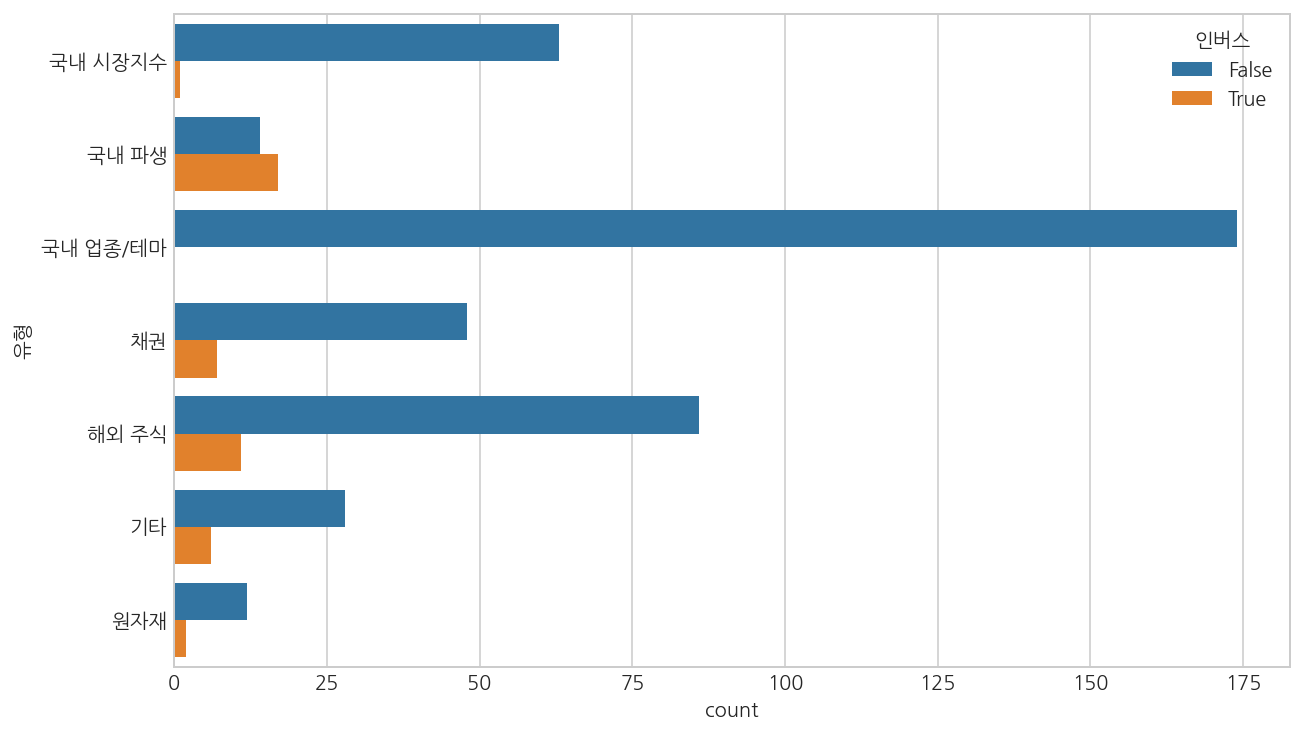

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='유형', hue='인버스') # hue 속성에는 범주형 변수 지정
plt.show()

<br>

`pd.crosstab`을 이용하여 두 개의 변수의 cross table 확인

In [29]:
pd.crosstab(df['유형'], df['인버스'])

인버스,False,True
유형,,
국내 시장지수,63,1
국내 업종/테마,174,0
국내 파생,14,17
기타,28,6
원자재,12,2
채권,48,7
해외 주식,86,11


In [30]:
pd.crosstab(df['인버스'], df['유형'])

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,63,174,14,28,12,48,86
True,1,0,17,6,2,7,11


<br>

`pd.crosstab()` 에 `normalize=True` 속성을 사용하면 비율을 구할 수 있다.

In [31]:
n = pd.crosstab(df['인버스'], df['유형'], normalize=True) * 100
n

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
인버스,,,,,,,
False,13.432836,37.100213,2.985075,5.970149,2.558635,10.234542,18.336887
True,0.213220,0.000000,3.624733,1.279318,0.426439,1.492537,2.345416


In [32]:
n.sum()

유형
국내 시장지수     13.646055
국내 업종/테마    37.100213
국내 파생        6.609808
기타           7.249467
원자재          2.985075
채권          11.727079
해외 주식       20.682303
dtype: float64

In [33]:
n.sum().sum()

100.0

<br>

**2) 유형 vs 레버리지**

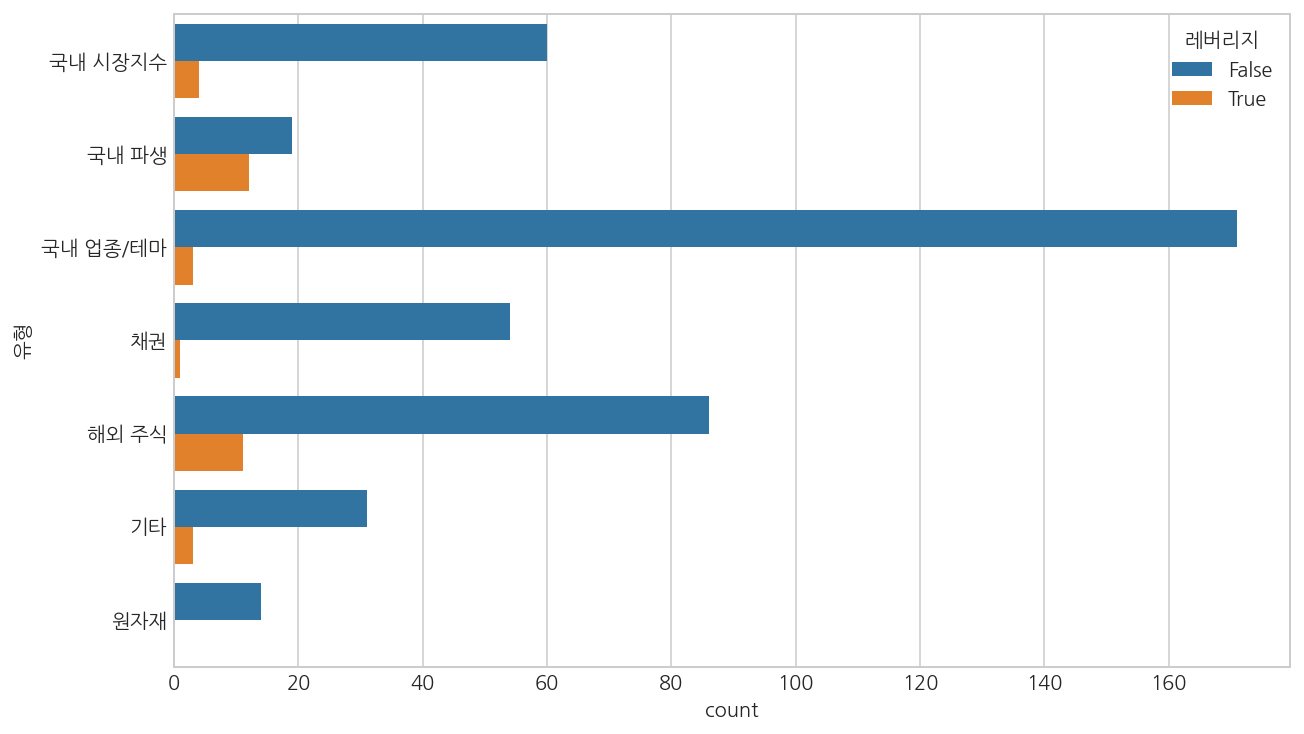

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='유형', hue='레버리지')
plt.show()

In [35]:
# 레버리지, 유형에 대한 빈도수 확인
pd.crosstab(df['레버리지'], df['유형'])

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
레버리지,,,,,,,
False,60,171,19,31,14,54,86
True,4,3,12,3,0,1,11


In [36]:
# 레버리지, 유형에 대한 빈도수 비율 확인
pd.crosstab(df['레버리지'], df['유형'], normalize=True) * 100

유형,국내 시장지수,국내 업종/테마,국내 파생,기타,원자재,채권,해외 주식
레버리지,,,,,,,
False,12.793177,36.460554,4.051173,6.609808,2.985075,11.513859,18.336887
True,0.852878,0.639659,2.558635,0.639659,0.000000,0.213220,2.345416


<br>

### 9.6.4 브랜드별 빈도수

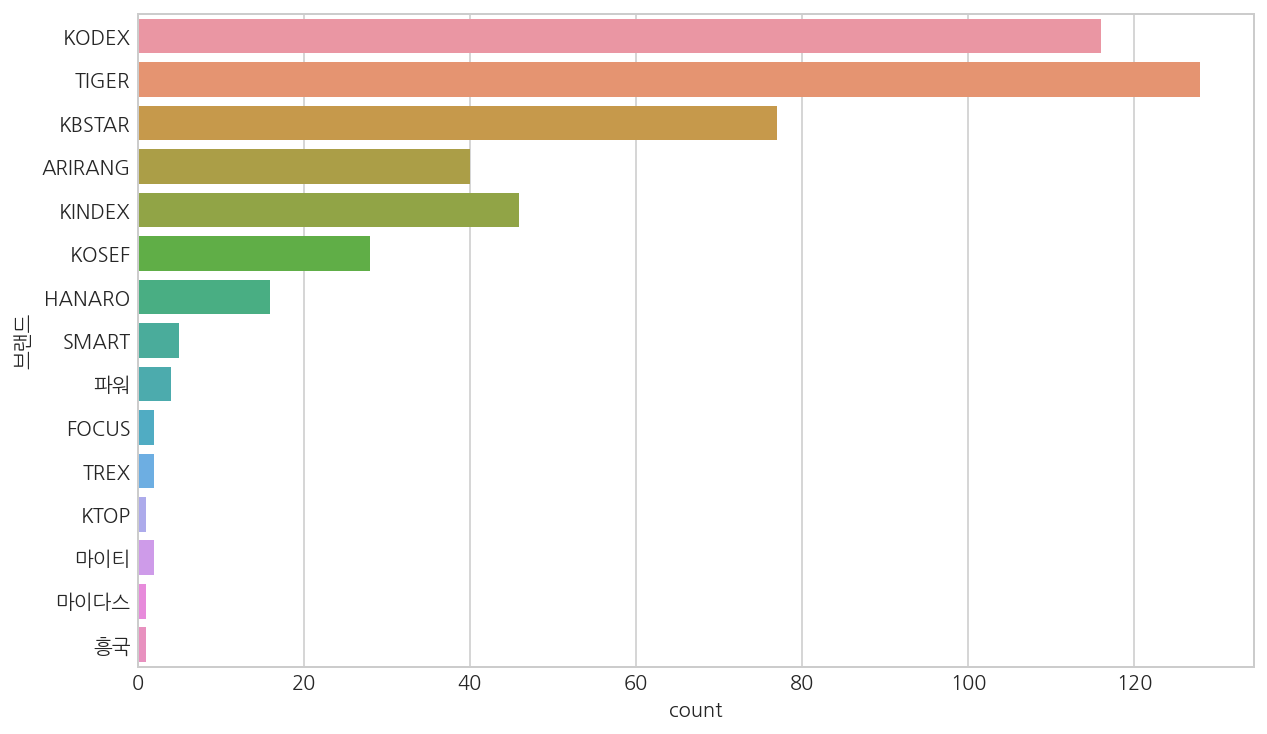

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='브랜드')
plt.show()

In [38]:
df['브랜드'].value_counts()

TIGER      128
KODEX      116
KBSTAR      77
KINDEX      46
ARIRANG     40
KOSEF       28
HANARO      16
SMART        5
파워           4
FOCUS        2
마이티          2
TREX         2
KTOP         1
마이다스         1
흥국           1
Name: 브랜드, dtype: int64

In [39]:
df['브랜드'].value_counts().index

Index(['TIGER', 'KODEX', 'KBSTAR', 'KINDEX', 'ARIRANG', 'KOSEF', 'HANARO',
       'SMART', '파워', 'FOCUS', '마이티', 'TREX', 'KTOP', '마이다스', '흥국'],
      dtype='object')

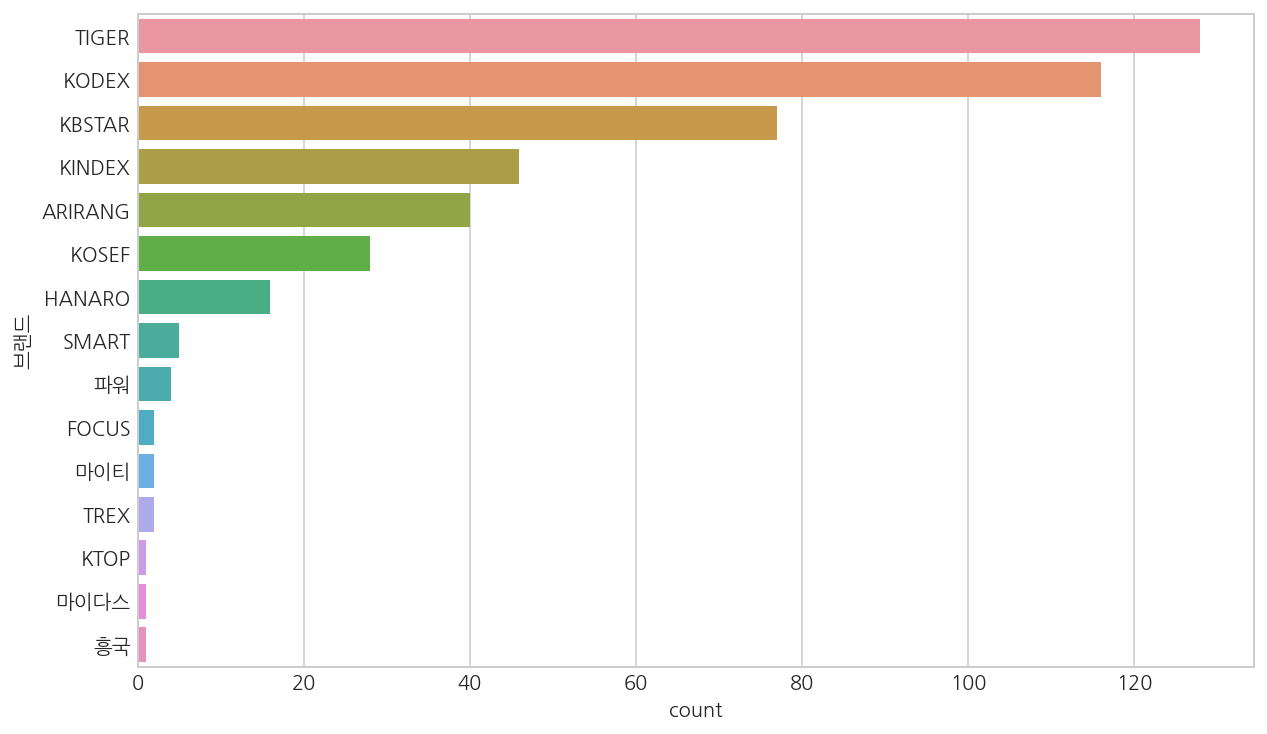

In [40]:
# 빈도수 기준 정렬
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='브랜드', order=df['브랜드'].value_counts().index)
plt.show()

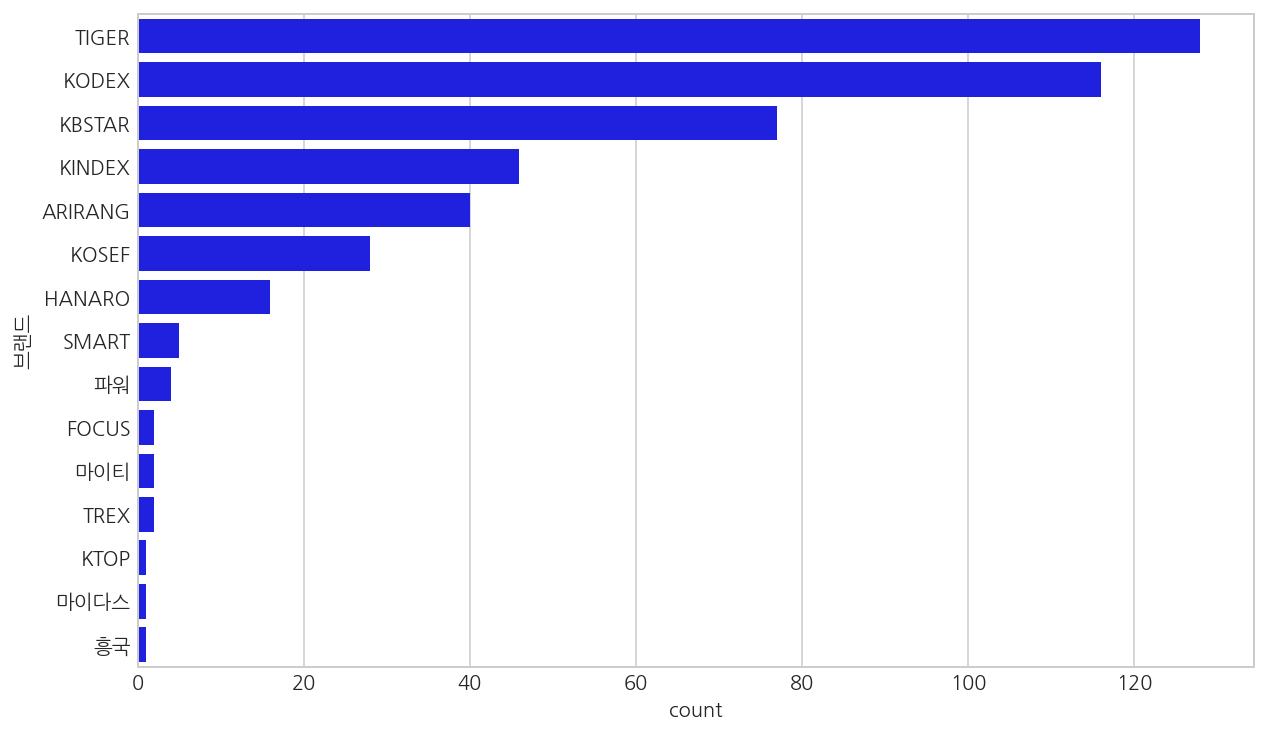

In [41]:
# 컬러 지정 (color 속성)
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='브랜드', order=df['브랜드'].value_counts().index, color='b')
plt.show()

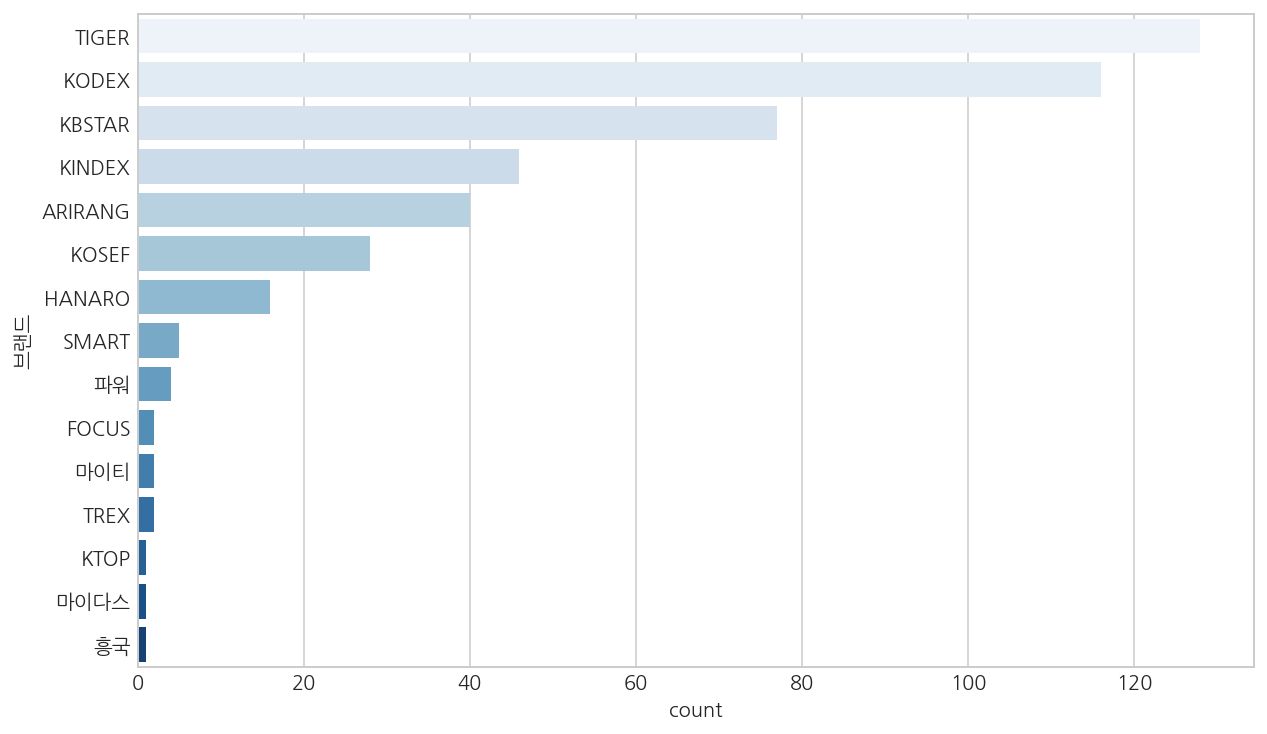

In [42]:
# 컬러 지정 (palette 속성)
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='브랜드', order=df['브랜드'].value_counts().index, palette='Blues')
plt.show()

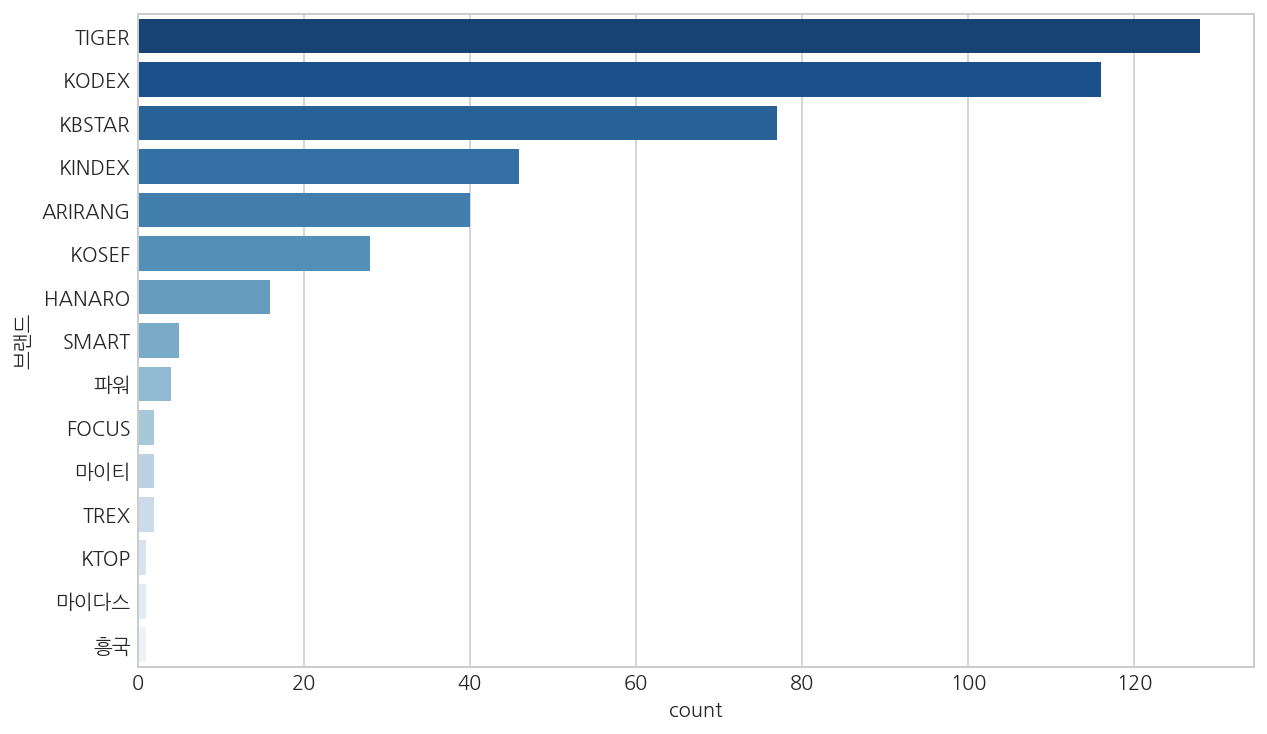

In [43]:
# 컬러 지정 (palette 속성)
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='브랜드', order=df['브랜드'].value_counts().index, palette='Blues_r')
plt.show()

<br>

### 9.6.5 인버스, 브랜드의 ETF 빈도 비율

> 인버스 ETF란?  
주식관련 장내 외 파생상품 투자 및 증권차입매도 등을 통해 기초지수(KOSPI 200 지수)의 일일 변동률(일별수익률)을 음의 1배수 즉, 역방향으로 추적하는 ETF를 말한다.

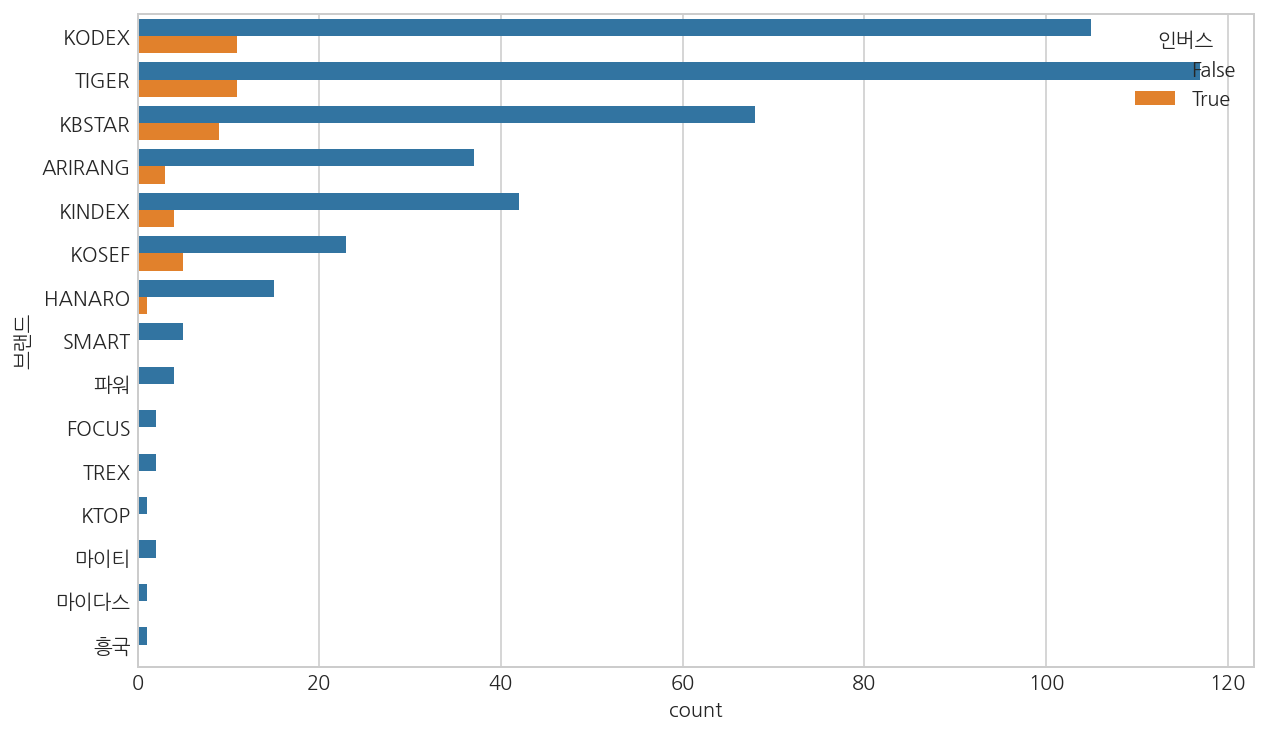

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='브랜드', hue='인버스')
plt.show()

In [45]:
# 인버스, 브랜드의 금융상품 빈도수
pd.crosstab(df['인버스'], df['브랜드'])

브랜드,ARIRANG,FOCUS,HANARO,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TREX,마이다스,마이티,파워,흥국
인버스,,,,,,,,,,,,,,,
False,37,2,15,68,42,105,23,1,5,117,2,1,2,4,1
True,3,0,1,9,4,11,5,0,0,11,0,0,0,0,0


In [46]:
# 인버스, 브랜드의 금융상품 빈도 비율
in_brand_norm = pd.crosstab(df['인버스'], df['브랜드'], normalize=True) * 100
in_brand_norm.round(2)

브랜드,ARIRANG,FOCUS,HANARO,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TREX,마이다스,마이티,파워,흥국
인버스,,,,,,,,,,,,,,,
False,7.89,0.43,3.20,14.50,8.96,22.39,4.90,0.21,1.07,24.95,0.43,0.21,0.43,0.85,0.21
True,0.64,0.00,0.21,1.92,0.85,2.35,1.07,0.00,0.00,2.35,0.00,0.00,0.00,0.00,0.00


<br>

### 9.6.6 레버리지, 브랜드의 ETF 빈도 비율

> 레버리지 ETF란?  
일반 ETF가 코스피200과 같은 지수 내 대표 주식을 보유함으로써 지수와 비슷한 수익률을 내는 것을 목표로 하는 데 비해 레버리지 ETF는 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF이다. 상승장에서는 높은 수익률을 기대할 수 있지만 하락장에서는 손실도 커져 고위험 고수익 상품으로 분류된다.

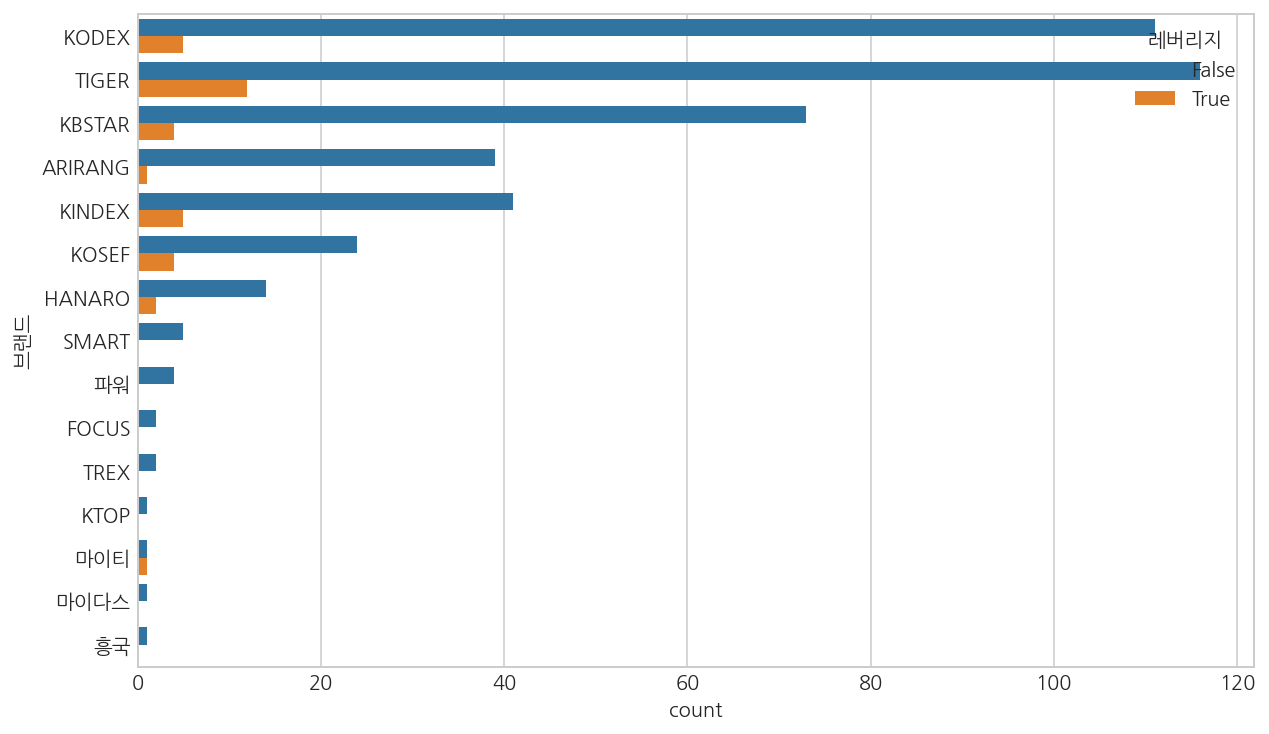

In [47]:
# 브랜드별 레버리지 여부에 따른 빈도수 시각화
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='브랜드', hue='레버리지')
plt.show()

In [48]:
# 레버리지, 브랜드의 ETF 빈도수 (crosstab)
pd.crosstab(df['레버리지'], df['브랜드'])

브랜드,ARIRANG,FOCUS,HANARO,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TREX,마이다스,마이티,파워,흥국
레버리지,,,,,,,,,,,,,,,
False,39,2,14,73,41,111,24,1,5,116,2,1,1,4,1
True,1,0,2,4,5,5,4,0,0,12,0,0,1,0,0


In [49]:
pd.crosstab(df['레버리지'], df['브랜드']).T

레버리지,False,True
브랜드,,
ARIRANG,39,1
FOCUS,2,0
HANARO,14,2
KBSTAR,73,4
KINDEX,41,5
KODEX,111,5
KOSEF,24,4
KTOP,1,0
SMART,5,0


<AxesSubplot:xlabel='레버리지'>

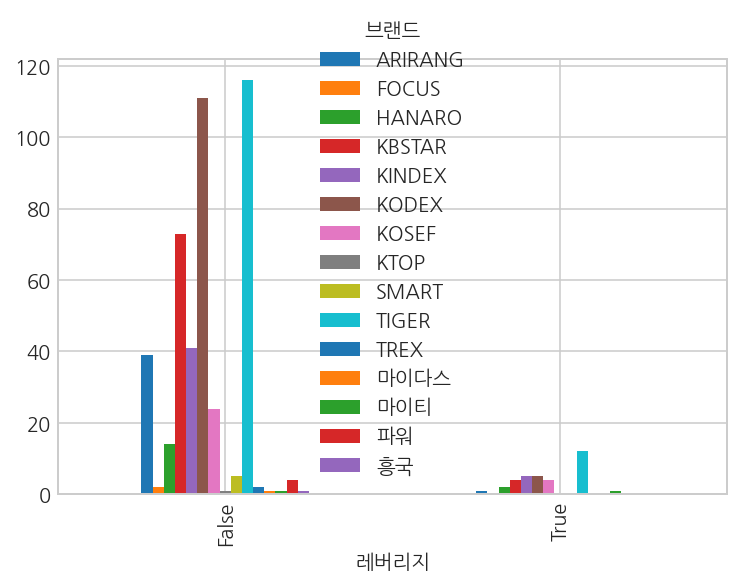

In [50]:
pd.crosstab(df['레버리지'], df['브랜드']).plot.bar()

<AxesSubplot:ylabel='브랜드'>

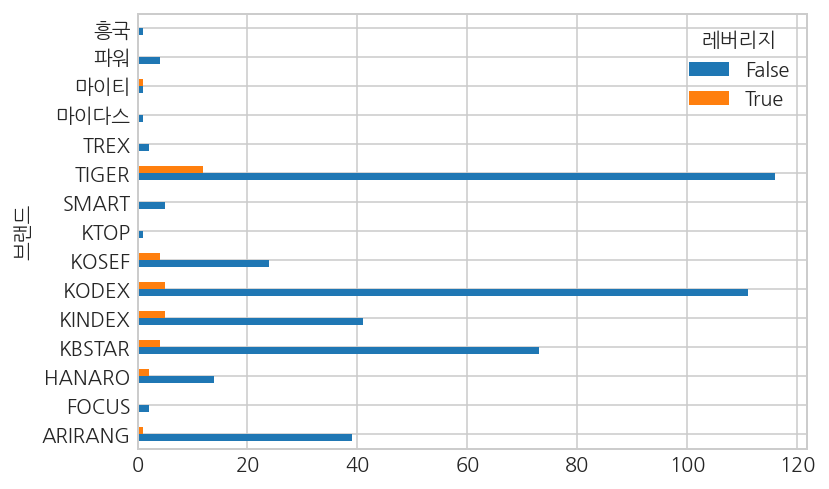

In [51]:
pd.crosstab(df['레버리지'], df['브랜드']).T.plot.barh()

<AxesSubplot:ylabel='브랜드'>

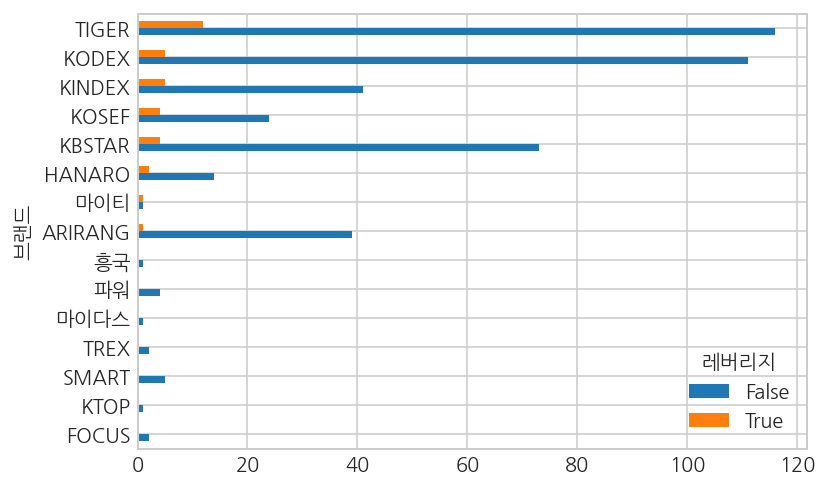

In [52]:
pd.crosstab(df['레버리지'], df['브랜드']).T.sort_values(by=True).plot.barh()

<AxesSubplot:ylabel='브랜드'>

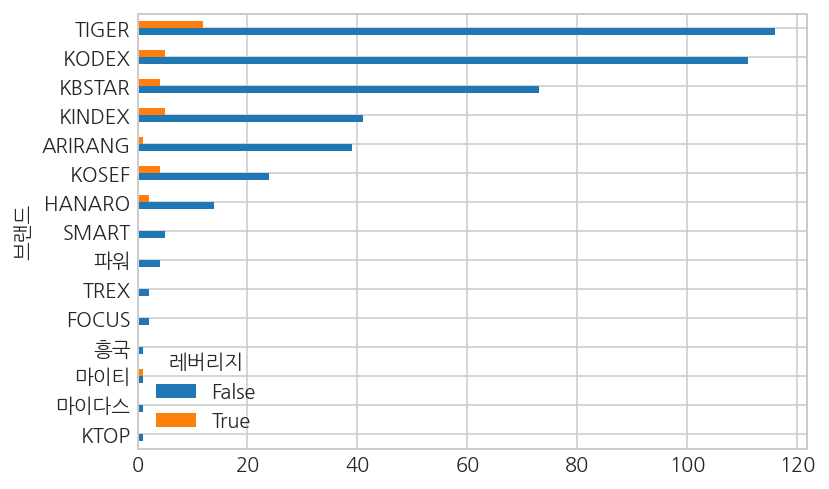

In [53]:
pd.crosstab(df['레버리지'], df['브랜드']).T.sort_values(by=False).plot.barh()

In [54]:
# 레버리지, 브랜드의 ETF 비율
pd.crosstab(df['레버리지'], df['브랜드'], normalize=True) * 100

브랜드,ARIRANG,FOCUS,HANARO,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TREX,마이다스,마이티,파워,흥국
레버리지,,,,,,,,,,,,,,,
False,8.315565,0.426439,2.985075,15.565032,8.742004,23.667377,5.117271,0.21322,1.066098,24.733475,0.426439,0.21322,0.21322,0.852878,0.21322
True,0.213220,0.000000,0.426439,0.852878,1.066098,1.066098,0.852878,0.00000,0.000000,2.558635,0.000000,0.00000,0.21322,0.000000,0.00000


<br>

### cf) `seaborn` vs `pandas.plot()`

- `seaborn`
  - 데이터프레임을 통째로 넣고 시각화 해 준다.  
  
  
- `pandas.plot()`
  - 계산된 결과를 시각화 해 준다.

<br>

## 9.7 수치형 변수의 기술통계

- `DataFrame.describe()`
  - 수치 데이터에 대한 기술통계값을 보여준다.

In [55]:
desc = df.describe()
desc

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,469.000000,469.000000,469.000000,469.000000,469.000000,341.000000,452.000000,4.690000e+02,4.690000e+02,469.000000
mean,3.264392,23528.560768,2.590618,131.300640,0.695416,26442.331378,22.009150,1.998222e+06,1.069966e+04,1228.149254
std,1.842759,25493.804432,1.154144,202.981551,1.069064,28052.290006,24.255505,3.020403e+07,9.039377e+04,4215.857920
min,1.000000,2045.000000,2.000000,-445.000000,-6.930000,2037.000000,-51.348200,0.000000e+00,0.000000e+00,13.000000
25%,2.000000,10750.000000,2.000000,10.000000,0.010000,10962.000000,5.462850,5.580000e+02,9.000000e+00,80.000000
50%,2.000000,14065.000000,2.000000,90.000000,0.680000,15127.000000,21.885050,6.221000e+03,9.400000e+01,155.000000
75%,4.000000,21745.000000,2.000000,200.000000,1.230000,28133.000000,37.774425,4.471000e+04,6.090000e+02,599.000000
max,7.000000,133650.000000,5.000000,1335.000000,7.460000,133607.000000,153.714200,6.420089e+08,1.329284e+06,62625.000000


<br>

## 9.8 수치형 변수로 히스토그램 그리기

### 9.8.1 수치형 컬럼만 리스트로 만들기

In [56]:
num_cols = desc.columns.tolist()
num_cols

['탭코드',
 '현재가',
 '등락구분',
 '전일비',
 '등락률',
 '순자산가치(NAV)',
 '3개월수익률',
 '거래량',
 '거래대금(백만)',
 '시가총액(억)']

<br>

### 9.8.2 히스토그램 그리기

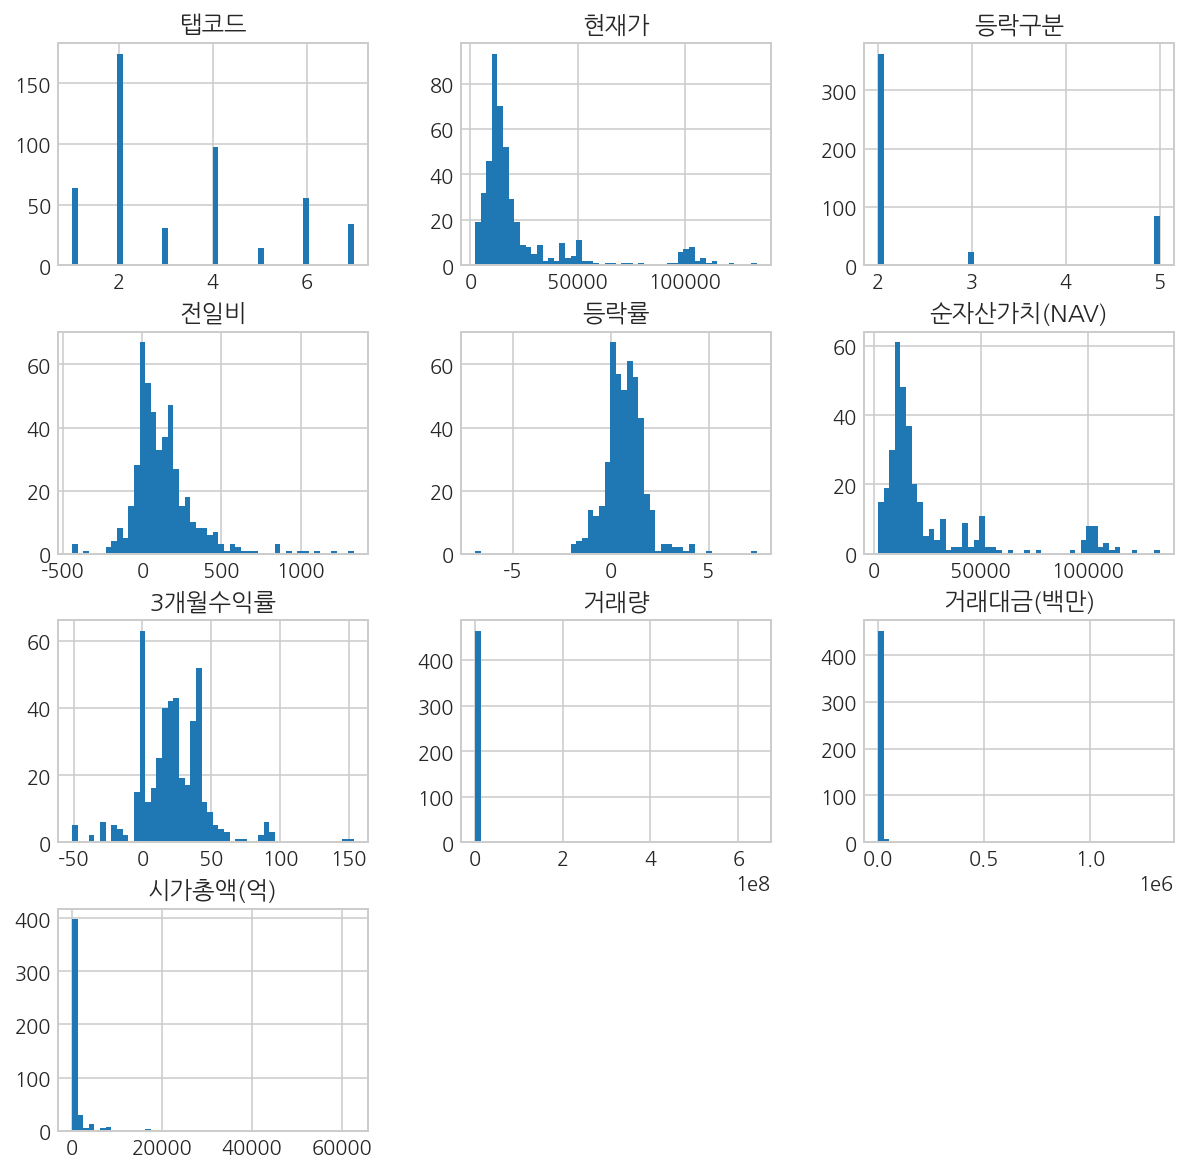

In [57]:
h = df[num_cols].hist(figsize=(10,10), bins=50)

<br>

히스토그램을 통해 `탭코드`, `등락구분`과 같은 범주형 변수를 찾아낼 수 있다.

<br>

## 9.9 범주형 변수 vs 수치형 변수

### 9.9.1 `seaborn`의 `barplot` 이해하기

- `seaborn`의 bar chart를 이용하여 각 브랜드에 대한 3개월 수익률의 평균값을 볼 수 있다.  
  
  
- 검은 막대는 `ci`로 신뢰구간을 의미한다.
  - `n_boot` 옵션을 통해 샘플링된 데이터의 신뢰구간을 의미
  - ex) `ci=95`
    - 데이터를 샘플링했을 때 데이터가 검은 막대 구간에 있을 확률이 95% 이다라는 것을 의미
  - 검은 막대가 짧다는 것은 실제 데이터가 해당 구간에 많이 모여있을 수 있다는 것을 의미한다. (혹은 모수가 적을 수 있음)
  - 신뢰구간을 그리는 데 시간이 많이 걸린다.
  - `ci=None` 옵션을 사용하여 신뢰구간을 표출하지 않고 그래프를 그리는 시간을 빠르게 할 수 있다.

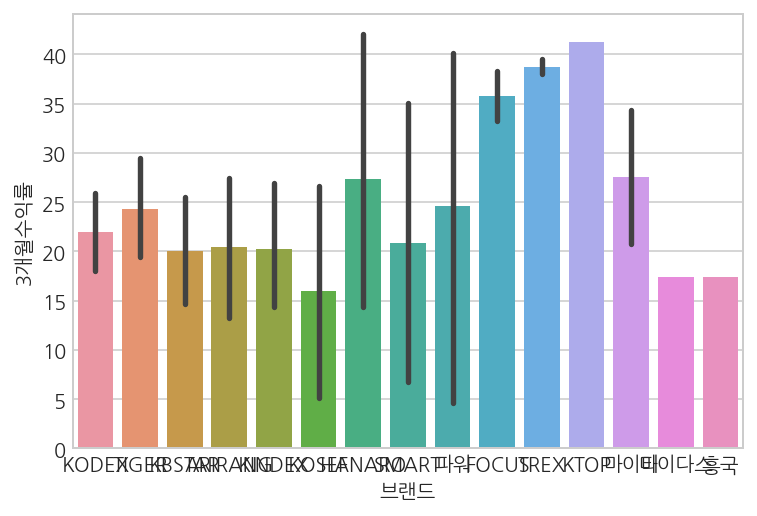

In [58]:
sns.barplot(data=df, x='브랜드', y='3개월수익률')
plt.show()

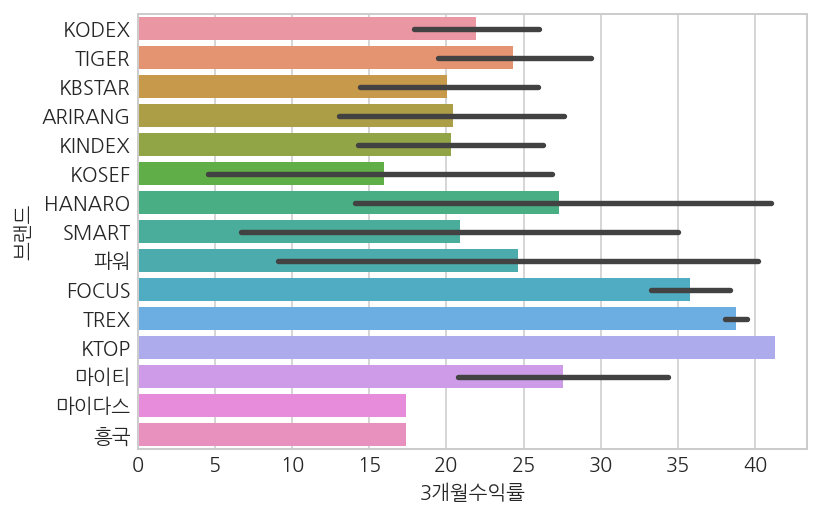

In [59]:
sns.barplot(data=df, y='브랜드', x='3개월수익률')
plt.show()

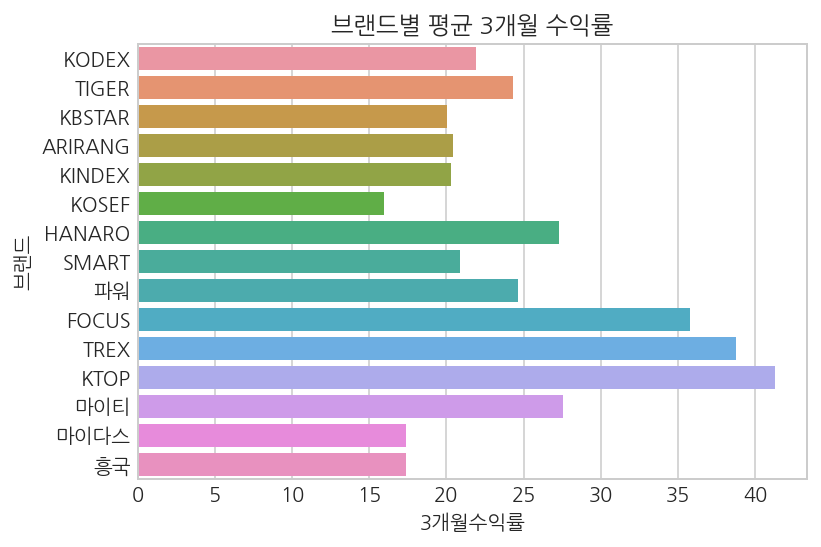

In [60]:
sns.barplot(data=df, y='브랜드', x='3개월수익률', ci=None).set_title('브랜드별 평균 3개월 수익률')
plt.show()

<br>

### 9.9.2 `barplot` 그래프의 값을 `groupby`로 직접 구하기

- `barplot()`의 `estimator` 속성을 확인하면 어떻게 수치형 변수 값을 구했는 지 알 수 있다.
  - default: `estimator = function mean`

In [61]:
df.groupby('브랜드').mean()['3개월수익률']

브랜드
ARIRANG    20.424215
FOCUS      35.803600
HANARO     27.308067
KBSTAR     20.026073
KINDEX     20.279767
KODEX      21.941112
KOSEF      15.979874
KTOP       41.297800
SMART      20.865000
TIGER      24.307202
TREX       38.758300
마이다스       17.361900
마이티        27.557100
파워         24.638025
흥국         17.366900
Name: 3개월수익률, dtype: float64

In [62]:
brand_3month_mean = df.groupby('브랜드')['3개월수익률'].mean()
brand_3month_mean

브랜드
ARIRANG    20.424215
FOCUS      35.803600
HANARO     27.308067
KBSTAR     20.026073
KINDEX     20.279767
KODEX      21.941112
KOSEF      15.979874
KTOP       41.297800
SMART      20.865000
TIGER      24.307202
TREX       38.758300
마이다스       17.361900
마이티        27.557100
파워         24.638025
흥국         17.366900
Name: 3개월수익률, dtype: float64

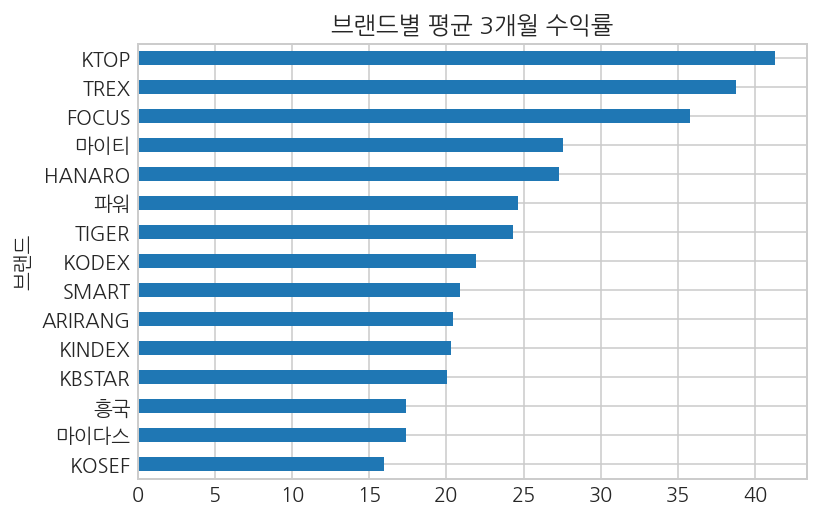

In [63]:
h = brand_3month_mean.sort_values().plot.barh(title='브랜드별 평균 3개월 수익률')

In [64]:
df[df['브랜드'] == '마이티']

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
253,159800,1,마이티 코스피100,33010,2,1335,4.21,33211.0,34.3584,206,6,132,국내 시장지수,마이티,False,False,False
425,292340,2,마이티 200커버드콜ATM레버리지,9840,2,95,0.97,9929.0,20.7558,183,1,49,국내 업종/테마,마이티,False,True,False


<br>

### 9.9.3 브랜드 대비 3개월 수익률에 대한 레버리지 여부에 따른 차이

- 브랜드 대비 3개월 수익률에 대한 정보를 레버리지 값의 차이를 barplot으로 그리기
- 레버리지 유/무에 따라서 평균 3개월 수익률은 많은 차이가 없다.
- 하지만 표준편차의 경우 레버리지가 있을 경우 굉창히 편차(`ci="sd"`)가 심함을 알 수 있다.
  - 레버리지 상품에 대해서는 검은 막대의 길이가 더 길다
- 즉, 레버리지 상품은 오를 때 더 많이 오르고 내릴 때 더 많이 내린다는 것을 알 수 있다.

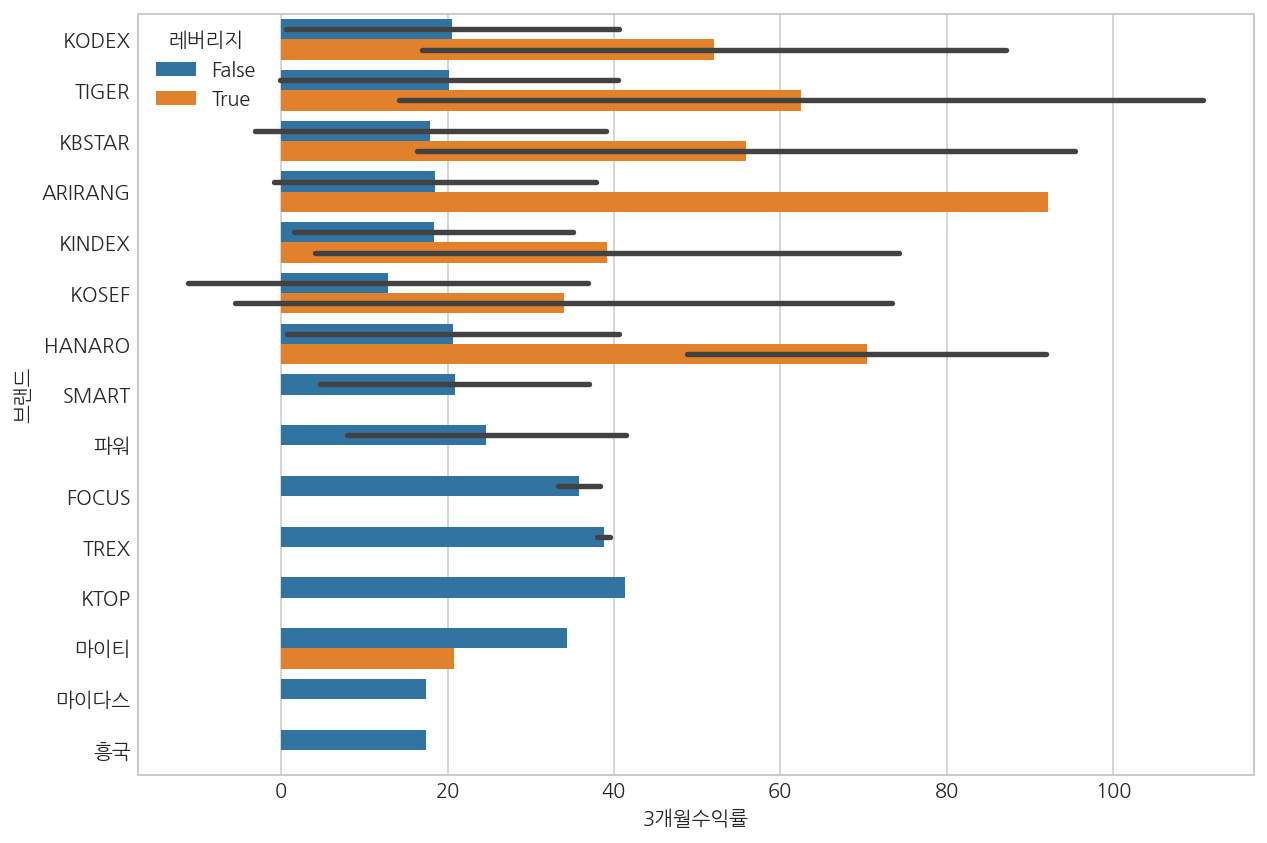

In [65]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='3개월수익률', y='브랜드', hue='레버리지', ci='sd')
plt.show()

In [66]:
df.groupby(['브랜드', '레버리지'])['3개월수익률'].mean()

브랜드      레버리지 
ARIRANG  False    18.534203
         True     92.244700
FOCUS    False    35.803600
HANARO   False    20.680723
         True     70.385800
KBSTAR   False    17.948771
         True     55.859525
KINDEX   False    18.339556
         True     39.196825
KODEX    False    20.548330
         True     52.025220
KOSEF    False    12.850883
         True     33.971575
KTOP     False    41.297800
SMART    False    20.865000
TIGER    False    20.218211
         True     62.471117
TREX     False    38.758300
마이다스     False    17.361900
마이티      False    34.358400
         True     20.755800
파워       False    24.638025
흥국       False    17.366900
Name: 3개월수익률, dtype: float64

<br>

### cf) pandas styling

- [Styling - pandas Document](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [70]:
g = df.groupby(['브랜드', '레버리지'])['3개월수익률'].mean().to_frame()
g

3개월수익률
브랜드     레버리지            
ARIRANG False  18.534203
        True   92.244700
FOCUS   False  35.803600
HANARO  False  20.680723
        True   70.385800
KBSTAR  False  17.948771
        True   55.859525
KINDEX  False  18.339556
        True   39.196825
KODEX   False  20.548330
        True   52.025220
KOSEF   False  12.850883
        True   33.971575
KTOP    False  41.297800
SMART   False  20.865000
TIGER   False  20.218211
        True   62.471117
TREX    False  38.758300
마이다스    False  17.361900
마이티     False  34.358400
        True   20.755800
파워      False  24.638025
흥국      False  17.366900

In [68]:
g.style.background_gradient()

In [69]:
g.style.background_gradient(cmap='Greens')

<br>

### 9.9.4 `barplot`의 한계

- `barplot()`은 보통 범주 내의 수치 데이터의 평균을 구하기 때문에 데이터의 많고 적음을 표현할 수 없다.
  - `barplot()`은 평균값만 표기
- `barplot()`의 단점을 보완하기 위해 나온 것이 바로 `boxplot()` 이다.
  - `boxplot()`은 사분위수, 이상치, 최대, 최소값 등 다양한 값 표기

<br>

### 9.9.5 `boxplot`으로 그리기

**`boxplot()`을 통해 볼 수 있는 값들**

- 사분위 수 : 데이터를 4등분 한 것
  - 제 1사분위 수 (Q1)
  - 중위수(median)
  - 제 3사분위 수 (Q3)  
  
  
- 사분위 범위 수 (IQR) : 데이터의 중간 50% (Q3 - Q1)  
  
  
- 이상치 (점으로 표시)
- 이상치를 제외한 최댓값
- 이상치를 제외한 최솟값
  

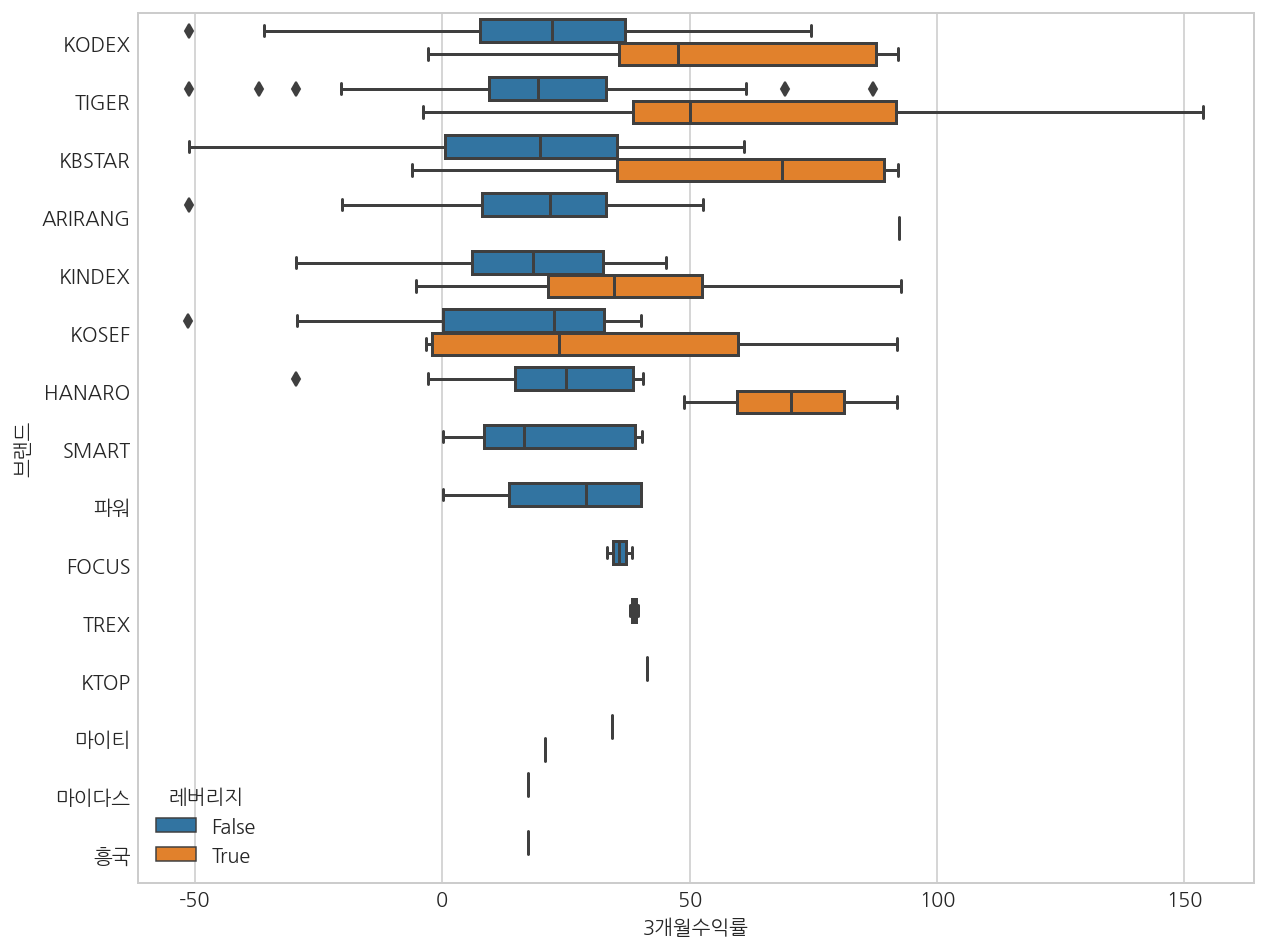

In [76]:
# 브랜드별 3개월 수익률을 레버리지에 따라 다른 색상으로 시각화
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='3개월수익률', y='브랜드', hue='레버리지')
plt.show()

<br>

### 9.9.6 `boxplot` 보는 방법

- 사분위수 범위 (IQR, Interquartile range) = Q3 - Q1
- 이상치를 제외한 최댓값 = Q3 + 1.5IQR
- 이상치를 제외한 최솟값 = Q1 - 1.5IQR

<br>

### 9.9.7 3개월 수익률에 대한 기술통계값 구하기

- 위에서 그린 `boxplot`의 값을 직접 구해 본다.

In [81]:
brand_3month_desc = df.groupby(['브랜드', '레버리지'])['3개월수익률'].describe()
brand_3month_desc

count       mean        std      min        25%       50%  \
브랜드     레버리지                                                               
ARIRANG False   38.0  18.534203  19.624472 -51.1125   7.939025  21.79770   
        True     1.0  92.244700        NaN  92.2447  92.244700  92.24470   
FOCUS   False    2.0  35.803600   3.610487  33.2506  34.527100  35.80360   
HANARO  False   13.0  20.680723  20.769551 -29.5947  14.611000  25.10240   
        True     2.0  70.385800  30.532447  48.7961  59.590950  70.38580   
KBSTAR  False   69.0  17.948771  21.270687 -51.1656   0.578900  19.66610   
        True     4.0  55.859525  45.658219  -6.0586  35.227025  68.68510   
KINDEX  False   39.0  18.339556  17.007340 -29.5858   6.044300  18.27950   
        True     4.0  39.196825  40.569546  -5.3911  21.382625  34.70205   
KODEX   False  108.0  20.548330  20.108557 -51.2821   7.605400  22.20715   
        True     5.0  52.025220  39.292685  -2.8955  35.702400  47.59060   
KOSEF   False   23.0  12.850883  24.562880 -51.3482   0.157900  22.49580   
        True     4.0  33.971575  45.638652  -3.3652  -2.104450  23.67190   
KTOP    False    1.0  41.297800        NaN  41.2978  41.297800  41.29780   
SMART   False    5.0  20.865000  18.095478   0.1099   8.383800  16.58380   
TIGER   False  112.0  20.218211  20.414349 -51.2416   9.425375  19.41845   
        True    12.0  62.471117  50.494422  -3.9389  38.458300  50.02480   
TREX    False    2.0  38.758300   1.027285  38.0319  38.395100  38.75830   
마이다스    False    1.0  17.361900        NaN  17.3619  17.361900  17.36190   
마이티     False    1.0  34.358400        NaN  34.3584  34.358400  34.35840   
        True     1.0  20.755800        NaN  20.7558  20.755800  20.75580   
파워      False    4.0  24.638025  19.373734   0.1819  13.538125  29.07750   
흥국      False    1.0  17.366900        NaN  17.3669  17.366900  17.36690   

                     75%       max  
브랜드     레버리지                        
ARIRANG False  33.098575   52.6140  
        True   92.244700   92.2447  
FOCUS   False  37.080100   38.3566  
HANARO  False  38.497600   40.4955  
        True   81.180650   91.9755  
KBSTAR  False  35.288900   60.9095  
        True   89.317600   92.1265  
KINDEX  False  32.441850   45.1582  
        True   52.516250   92.7743  
KODEX   False  36.838275   74.4288  
        True   87.664000   92.0646  
KOSEF   False  32.594250   40.2242  
        True   59.747925   91.9077  
KTOP    False  41.297800   41.2978  
SMART   False  38.875200   40.3723  
TIGER   False  33.071125   87.0901  
        True   91.749650  153.7142  
TREX    False  39.121500   39.4847  
마이다스    False  17.361900   17.3619  
마이티     False  34.358400   34.3584  
        True   20.755800   20.7558  
파워      False  40.177400   40.2152  
흥국      False  17.366900   17.3669

<img src="https://miro.medium.com/max/875/1*NRlqiZGQdsIyAu0KzP7LaQ.png" style="width:500px; margin-left:20px;" />